## Problem 1

### 1.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# reading the image
img1 = 'first_frame.png'
img2 = 'second_frame.png'

image1 = mpimg.imread(img1)
image2 = mpimg.imread(img2)

In [76]:
def MAD(imageA, imageB, xA, yA, xB, yB):
    
    imgA = imageA[xA - 8 : xA + 8, yA - 8 : yA + 8]
    imgB = imageB[xB - 8 : xB + 8, yB - 8 : yB + 8]
    s = np.sum(abs(imgA - imgB))/256
    return s

def checkBoundaries(x, y, N, M):
    if x - 8 < 0 or y - 8 < 0 or x + 7 >= N or y + 7 >= M:
        return False
    return True

def BlockSearch(imageA, imageB, x, y, offset):
    
    N = imageA.shape[0]
    M = imageA.shape[1]
    
    minVal = np.inf
    coords = []
    
    if (checkBoundaries(x, y, N, M)):
        mad = MAD(imageA, imageB, x, y, x, y)
        if minVal > mad:
            minVal = mad
            coords = [0, 0]
    
    if (checkBoundaries(x + offset, y + offset, N, M)):
        mad = MAD(imageA, imageB, x, y, x + offset, y + offset)
        if minVal > mad:
            minVal = mad
            coords = [offset, offset]
            
    if (checkBoundaries(x - offset, y - offset, N, M)):
        mad = MAD(imageA, imageB, x, y, x - offset, y - offset)
        if minVal > mad:
            minVal = mad
            coords = [-offset, -offset]
            
    if (checkBoundaries(x + offset, y - offset, N, M)):
        mad = MAD(imageA, imageB, x, y, x + offset, y - offset)
        if minVal > mad:
            minVal = mad
            coords = [offset, -offset]
            
    if (checkBoundaries(x - offset, y + offset, N, M)):
        mad = MAD(imageA, imageB, x, y, x - offset, y + offset)
        if minVal > mad:
            minVal = mad
            coords = [-offset, offset]
            
    if (checkBoundaries(x + offset, y, N, M)):
        mad = MAD(imageA, imageB, x, y, x + offset, y)
        if minVal > mad:
            minVal = mad
            coords = [offset, 0]
            
    if (checkBoundaries(x, y + offset, N, M)):
        mad = MAD(imageA, imageB, x, y, x, y + offset)
        if minVal > mad:
            minVal = mad
            coords = [0, offset]
            
    if (checkBoundaries(x - offset, y, N, M)):
        mad = MAD(imageA, imageB, x, y, x - offset, y)
        if minVal > mad:
            minVal = mad
            coords = [-offset, 0]
            
    if (checkBoundaries(x, y - offset, N, M)):
        mad = MAD(imageA, imageB, x, y, x, y - offset)
        if minVal > mad:
            minVal = mad
            coords = [0, -offset]
            
    return coords
    

def ThreeStepSearch(imageA, imageB):
    
    M = int(imageA.shape[0]/16)
    N = int(imageA.shape[1]/16)
    
    motionVectors = []
    for i in range(M):
        
        x = i*16 + 8
        for j in range(N):
            
            y = j*16 + 8
            coords1 = BlockSearch(imageA, imageB, x, y, 4)
            coords2 = BlockSearch(imageA, imageB, x + coords1[0], y + coords1[1], 2)
            coords3 = BlockSearch(imageA, imageB, x + coords1[0] + coords2[0], y + coords1[1] + coords2[1], 1)
            
            coords3[0] = coords1[0] + coords2[0] + coords3[0]
            coords3[1] = coords1[1] + coords2[1] + coords3[1]
            motionVectors.append([x, y, coords3[0], coords3[1]])
            
    return motionVectors
            

In [83]:
motionVectors = ThreeStepSearch(image2, image1)
print(len(motionVectors))

99


### 2.

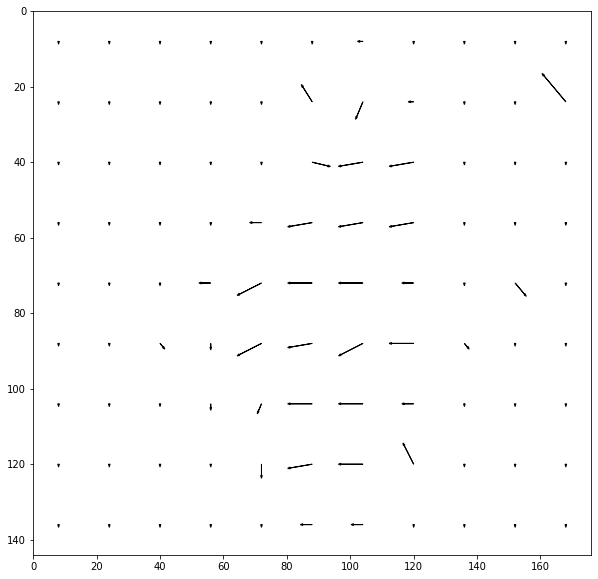

In [78]:
M = image1.shape[0]
N = image1.shape[1]

plt.figure(figsize = (10, 10))
for v in motionVectors:
    plt.arrow(v[1], v[0], v[3], v[2], head_width = 0.5)

plt.xlim(0, N)
plt.ylim(M, 0)
plt.show()

### 3.

In [79]:
def predictedFrame(image, motionVectors):
    
    M = image.shape[0]
    N = image.shape[1]
    
    outputImg = np.zeros((M, N))
    
    M = int(M/16)
    N = int(N/16)
    
    ind = 0
    for i in range(M):
            
        x = i*16 + 8
        for j in range(N):
            
            y = j*16 + 8
            
            x_ = x + motionVectors[ind][2]
            y_ = y + motionVectors[ind][3]
            
            outputImg[x - 8 : x + 8, y - 8 : y + 8] = image[x_ - 8 : x_ + 8, y_ - 8 : y_ + 8]
            ind += 1
            
    return outputImg

In [80]:
predictedFrame2 = predictedFrame(image1, motionVectors)

### 4.

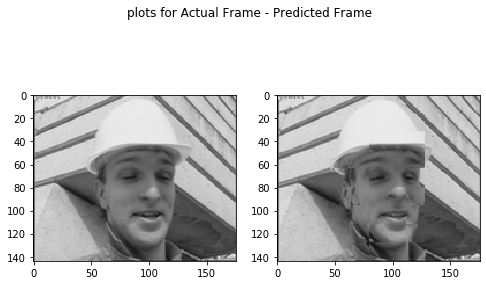

In [81]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 8))
fig.subplots_adjust(hspace = .5)
ax[0].imshow(image2, cmap = 'gray')
ax[1].imshow(predictedFrame2, cmap = 'gray')
fig.suptitle('plots for Actual Frame - Predicted Frame', y = .8)
plt.show()

In [85]:
print('Error between the original frame and predicted frame is ', np.mean(abs(image2 - predictedFrame2)))

Error between the original frame and predicted frame is  0.019255051054789526


In [43]:
print(np.mean(abs(image2 - image1)))

0.01892423
